In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [9]:
dib = pd.read_csv('diabetes.csv')

In [10]:
dib.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
dib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dib.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

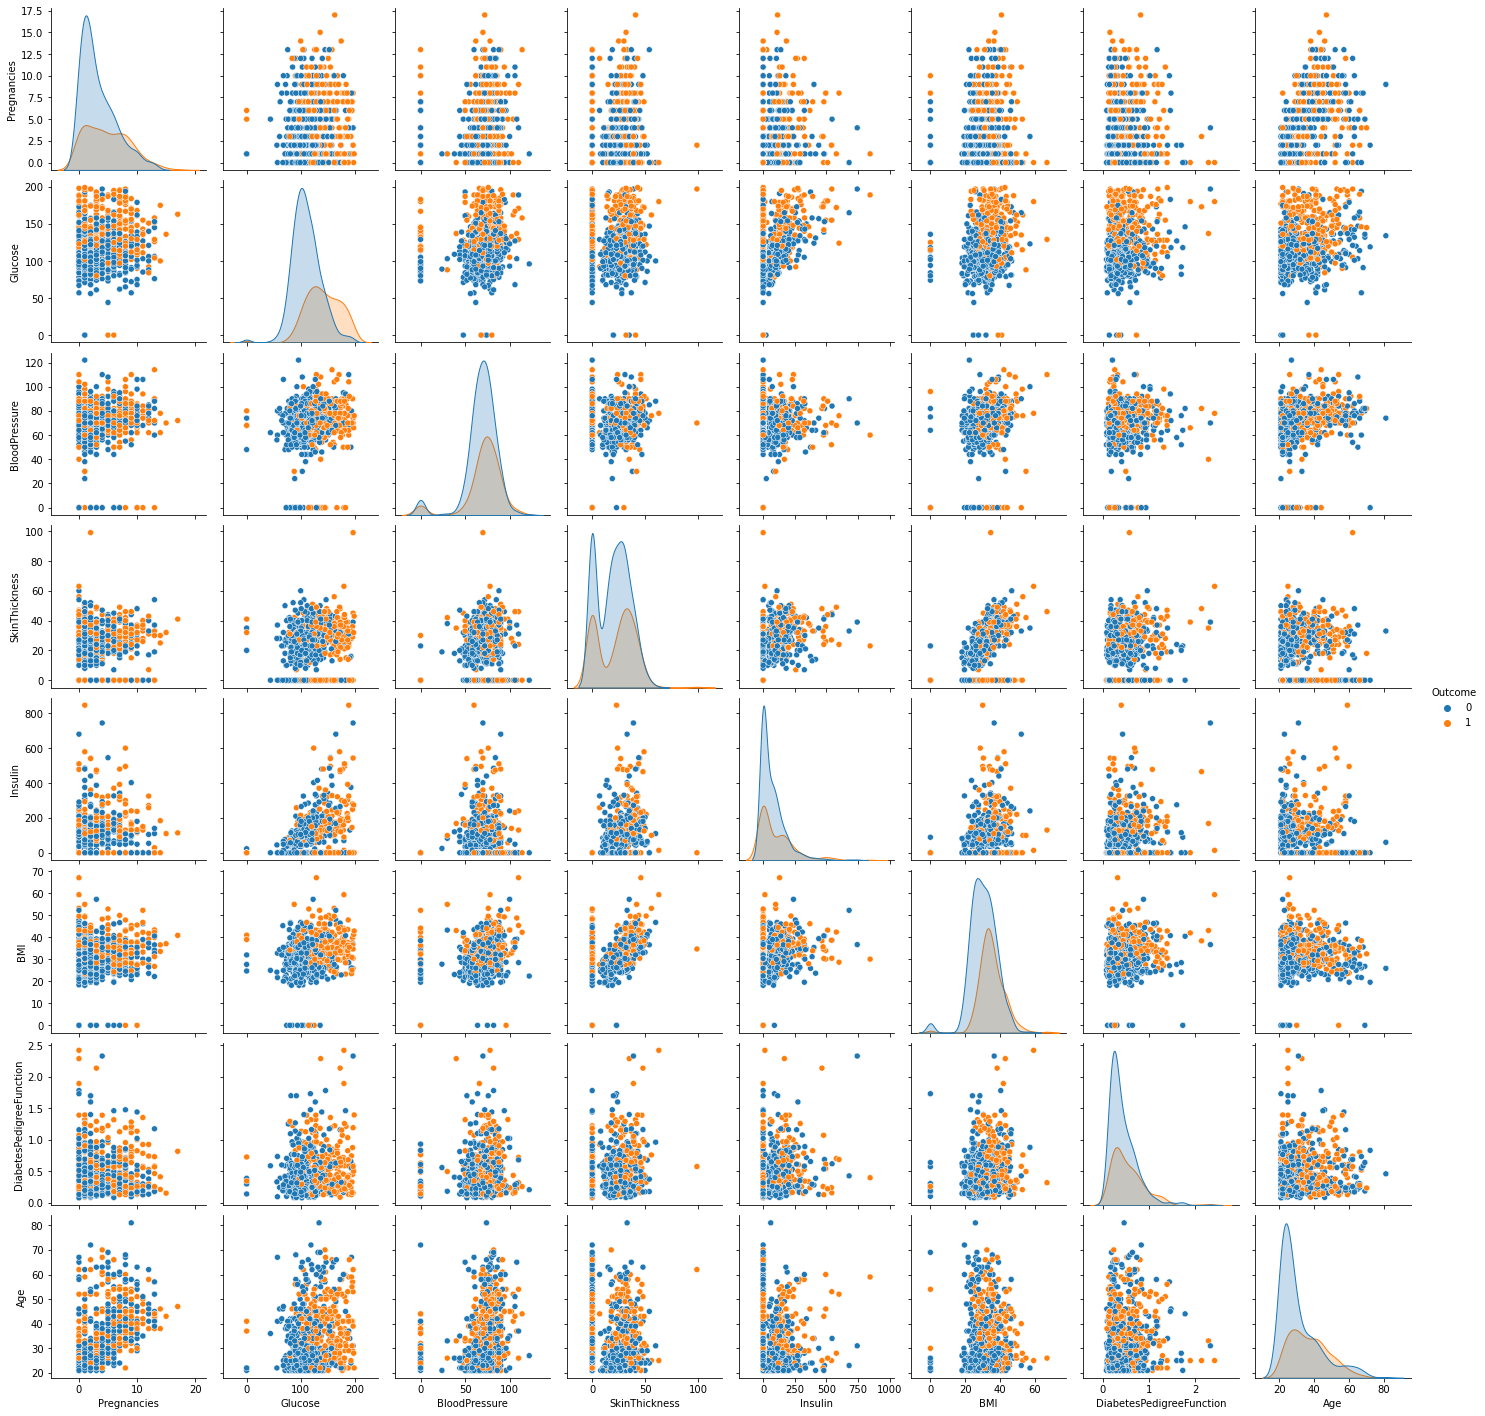

In [12]:
sns.pairplot(dib, hue='Outcome')

<AxesSubplot:>

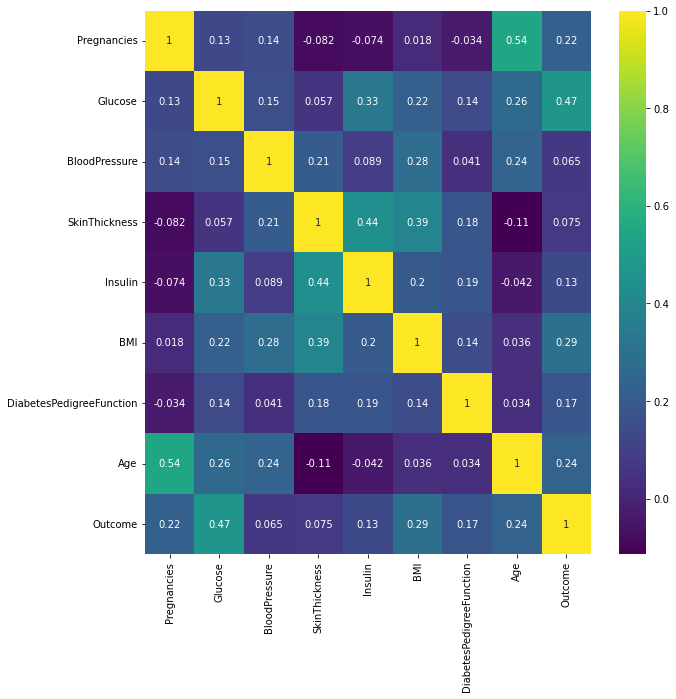

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(dib.corr(), annot=True, cmap='viridis')

In [17]:
X = dib.drop('Outcome', axis=1)
y = dib['Outcome']

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(2)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
pr = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test, pr))

[[143   8]
 [ 59  21]]


In [31]:
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       151
           1       0.72      0.26      0.39        80

    accuracy                           0.71       231
   macro avg       0.72      0.60      0.60       231
weighted avg       0.71      0.71      0.66       231



In [34]:
er = []

for i in range(1, 50):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pr = knn.predict(X_test)
    er.append(np.mean(pr != y_test))

In [35]:
px.line(er)

In [38]:
pd.array(er).argmin()

26

In [39]:
knn = KNeighborsClassifier(26)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26)

In [41]:
pr = knn.predict(X_test)

In [42]:
print(confusion_matrix(y_test, pr))

[[139  12]
 [ 50  30]]


In [44]:
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       151
           1       0.71      0.38      0.49        80

    accuracy                           0.73       231
   macro avg       0.72      0.65      0.65       231
weighted avg       0.73      0.73      0.70       231



The nominal value for n_neighbors should be 3, but if we want the smallest value for error, 26 will be the right choice.